## SVM - Support Vector Machines

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

### Dataset 01: Breast Cancer

In [2]:
# Importando os dados
from sklearn.datasets import load_breast_cancer

# Instanciando
cancer = load_breast_cancer()

# Separando entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [3]:
svc = SVC()

svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
print("Score de treino: ", svc.score(X_train, y_train))
print("Score de teste: ", svc.score(X_test, y_test))

Score de treino:  1.0
Score de teste:  0.6293706293706294


Olhando os scores vemos que há uma grande diferença de resultado entre o treino e teste. Conforme citado na parte teórica, o SVM é sensível à escala e isso pode estar afetando o modelo. Vamos, a seguir, verificar os valores mínimos e máximos de cada uma das fetaures e verificar se estão numa mesma escala.

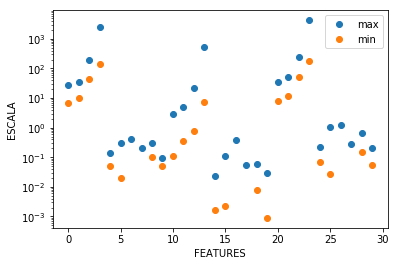

In [5]:
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.legend(loc="best")
plt.xlabel("FEATURES")
plt.ylabel("ESCALA")
plt.yscale("log")

Como pode ser visto acima, as features estão em escalas diferentes. Para corrigir esse problema e melhorar a performance do modelo, vamos normalizar os dados.

Text(0,0.5,'ESCALA')

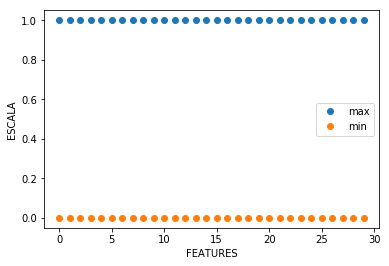

In [6]:
# Instanciando o modelo MinMax
scaler = MinMaxScaler()

# Aplicando o MinMax no dataset inteiro
X = cancer.data
X_norm = scaler.fit_transform(X)

# Plotando novamente o gráfico com a variação máxima e mínima de cada uma das 30 features
plt.plot(X_norm.max(axis=0), 'o', label="max")
plt.plot(X_norm.min(axis=0), 'o', label="min")
plt.legend(loc="best")
plt.xlabel("FEATURES")
plt.ylabel("ESCALA")

Como podemos ver acima, cada uma das fetaures varia entre 1 e 0 após a normalização. Vamos então aplicar os dados normaizados novamente ao modelo.

In [7]:
# Dividindo entre treino e teste
X_Ntrain, X_Ntest, y_train, y_test = train_test_split(X_norm, cancer.target, random_state=0)

# Treinando o modelo
svc.fit(X_Ntrain, y_train)

# Verificando o score
print("Score de treino: ", svc.score(X_Ntrain, y_train))
print("Score de teste: ", svc.score(X_Ntest, y_test))

Score de treino:  0.9483568075117371
Score de teste:  0.958041958041958


Houve uma melhoria significativa após a normalização dos dados! Também podemos alterar os parâmetro para buscar um resultado ainda melhor.

In [8]:
parametro = (1, 10, 100, 1000, 10000)

for i in parametro:
    svc = SVC(C=i)
    svc.fit(X_Ntrain, y_train)
    
    print("Score de treino, C=", i, ": ", svc.score(X_Ntrain, y_train))
    print("Score de teste, C=", i, ": ", svc.score(X_Ntest, y_test), chr(10))

Score de treino, C= 1 :  0.9483568075117371
Score de teste, C= 1 :  0.958041958041958 

Score de treino, C= 10 :  0.9765258215962441
Score de teste, C= 10 :  0.958041958041958 

Score de treino, C= 100 :  0.9859154929577465
Score de teste, C= 100 :  0.965034965034965 

Score de treino, C= 1000 :  0.9859154929577465
Score de teste, C= 1000 :  0.972027972027972 

Score de treino, C= 10000 :  0.9953051643192489
Score de teste, C= 10000 :  0.958041958041958 



Conforme podemos ver acima à medida que fomos aumentando o valor de C, os resultados foram ficando cada vez melhor, porém ao configurarmos C=10000, obtivemos um valor superior nos dados de treino e uma queda nos dados de teste, indicando um overfitting. Dado os resultados acima, podemos concluir que para esses dados o melhor valor para C está em torno de 1000.